In [124]:
import torch.nn as nn
import torch
import numpy as np
import gzip
import pickle

In [137]:
from torch.utils.data import Dataset, DataLoader,TensorDataset

In [125]:
# Data Preprocessing
PATH= "/home/shaun/Downloads/mnist.pkl.gz"
with gzip.open(PATH, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [138]:
# convert to torch tensors
x_train, y_train = map(torch.tensor, (x_train, y_train))
# create data set
train_ds = TensorDataset(x_train, y_train)
bs = 12
dl = DataLoader(train_ds,batch_size=bs)

In [140]:
x, y = next(iter(dl))

In [141]:
x.shape, y.shape

(torch.Size([12, 784]), torch.Size([12]))

In [69]:
# Define our model
in_size = 784
out_size = 10

model = nn.Sequential(
    nn.Linear(in_size,out_size, bias=False))

In [117]:
# look at out model
model

Sequential(
  (0): Linear(in_features=784, out_features=10, bias=False)
)

In [70]:
# Define our loss
loss_fn = nn.CrossEntropyLoss()

In [111]:
lr = 1e-4

In [142]:
def train_step(x,y):
    
    y_pred = model(x)
    
    loss = loss_fn(y_pred, y)
    
    model.zero_grad()
    
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad
    return loss.item()
    

In [172]:
history = []
for epoch in range(200):

    history += [train_step(x,y) for x,y in dl]

In [173]:
history[1],history[-1]

(0.22857218980789185, 0.337765634059906)

In [174]:
for m in model.parameters():
    layer = m.detach()

In [177]:
feats_spaces= []
for i,feat in enumerate(layer):
    feats_spaces.append(feat.numpy().reshape((28,28)))


In [165]:
%matplotlib inline
import matplotlib.pyplot as plt

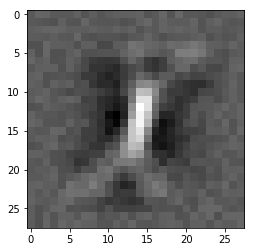

In [180]:
plt.imshow(feats_spaces[1], cmap="gray")

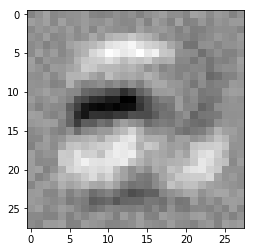

In [181]:
plt.imshow(feats_spaces[2], cmap="gray")

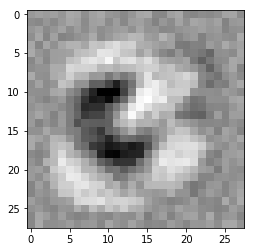

In [182]:
plt.imshow(feats_spaces[3], cmap="gray")

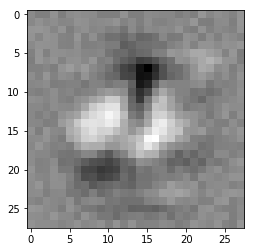

In [183]:
plt.imshow(feats_spaces[4], cmap="gray")

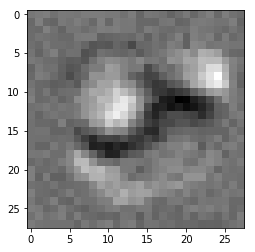

In [184]:
plt.imshow(feats_spaces[5], cmap="gray")

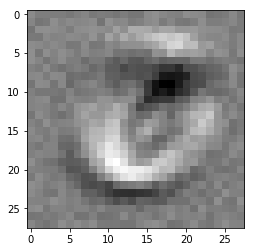

In [185]:
plt.imshow(feats_spaces[6], cmap="gray")

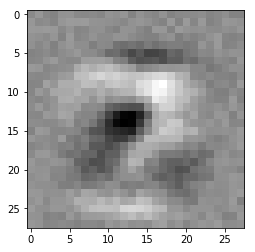

In [186]:
plt.imshow(feats_spaces[7], cmap="gray")

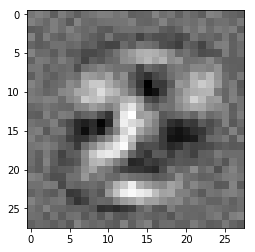

In [187]:
plt.imshow(feats_spaces[8], cmap="gray")

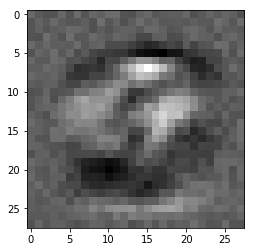

In [188]:
plt.imshow(feats_spaces[9], cmap="gray")